<a href="https://colab.research.google.com/github/ArushiG11/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
data<-read.csv("/content/marketing_campaign.csv", sep = "\t")

In [3]:
head(data)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
4,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
6,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


In [4]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
#summarizing structure of data frame
str(data)

'data.frame':	2240 obs. of  29 variables:
 $ ID                 : int  5524 2174 4141 6182 5324 7446 965 6177 4855 5899 ...
 $ Year_Birth         : int  1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 ...
 $ Education          : chr  "Graduation" "Graduation" "Graduation" "Graduation" ...
 $ Marital_Status     : chr  "Single" "Single" "Together" "Together" ...
 $ Income             : int  58138 46344 71613 26646 58293 62513 55635 33454 30351 5648 ...
 $ Kidhome            : int  0 1 0 1 1 0 0 1 1 1 ...
 $ Teenhome           : int  0 1 0 0 0 1 1 0 0 1 ...
 $ Dt_Customer        : chr  "04-09-2012" "08-03-2014" "21-08-2013" "10-02-2014" ...
 $ Recency            : int  58 38 26 26 94 16 34 32 19 68 ...
 $ MntWines           : int  635 11 426 11 173 520 235 76 14 28 ...
 $ MntFruits          : int  88 1 49 4 43 42 65 10 0 0 ...
 $ MntMeatProducts    : int  546 6 127 20 118 98 164 56 24 6 ...
 $ MntFishProducts    : int  172 2 111 10 46 0 50 3 3 1 ...
 $ MntSweetProducts   : int  88 1 21 

In [7]:
#counting the total number of missing values in the data
install.packages("naniar")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘plyr’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’




In [8]:
library(naniar)

In [9]:
n_miss(data)

[1] 24

In [10]:
#eliminating missing values
data <- na.omit(data)
dim(data)

[1] 2216   29

In [11]:
#creating a new variable
data <- data %>% mutate(Age = 2024 - Year_Birth)
#dropping outliers from data set
data <- data %>% filter(Age < 80 & Income < 70000 & MntMeatProducts < 300 & NumCatalogPurchases < 10)
dim(data)

[1] 1589   30

In [12]:
#transforming Marital_Status
data <- data %>% mutate(Marital_Status = replace(Marital_Status, Marital_Status == "Divorced" |Marital_Status == "Widow" | Marital_Status== "Alone" | Marital_Status == "Absurd" | Marital_Status == "YOLO","Single"))
data <- data %>% mutate(Marital_Status = replace(Marital_Status, Marital_Status == "Together" | Marital_Status == "Married", "Taken"))

In [14]:
#transforming the Education
data <- data %>% mutate(Education = replace(Education, Education == "Graduation"| Education == "PhD" | Education == "Master", "graduate"))
data <- data %>% mutate(Education = replace(Education, Education == "Basic"| Education == "2n Cycle", "non-graduate"))
#converting them to factors
data <- data %>% mutate(Marital_Status = as.factor(Marital_Status), Education = as.factor(Education))
#renaming a variable
data <- data %>% rename(wines = MntWines, fruits = MntFruits, meat = MntMeatProducts, fish = MntFishProducts, sweet = MntSweetProducts, gold = MntGoldProds )
#creating a new variable
data <- data %>% mutate(Total_spent = wines + fruits + meat + fish + sweet + gold)
#dropping redundant variables
data <- data %>% select(- ID, - Year_Birth, - Dt_Customer, - Z_CostContact, - Z_Revenue)

In [15]:
head(data)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,wines,fruits,meat,fish,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spent
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,graduate,Single,46344,1,1,38,11,1,6,2,⋯,5,0,0,0,0,0,0,0,70,27
2,graduate,Taken,26646,1,0,26,11,4,20,10,⋯,6,0,0,0,0,0,0,0,40,53
3,graduate,Taken,58293,1,0,94,173,43,118,46,⋯,5,0,0,0,0,0,0,0,43,422
4,graduate,Taken,62513,0,1,16,520,42,98,0,⋯,6,0,0,0,0,0,0,0,57,716
5,graduate,Single,55635,0,1,34,235,65,164,50,⋯,6,0,0,0,0,0,0,0,53,590
6,graduate,Taken,33454,1,0,32,76,10,56,3,⋯,8,0,0,0,0,0,0,0,39,169


In [16]:
#making a copy
customers_copy <- data
#converting the categorical features to numeric
customers_copy <- customers_copy %>% mutate(Education = case_when(Education == "graduate" ~ 1, Education == "non-graduate" ~ 0))
customers_copy <- customers_copy %>% mutate(Marital_Status = case_when(Marital_Status == "Taken" ~ 1, Marital_Status == "Single" ~ 0))


In [17]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’




In [18]:
library(caret)
#standardinzing
customers_copy_pre <- preProcess(customers_copy[,c(3, 6:17, 25:26)], method = c("center", "scale"))
#normalizing
customers_copy <- predict(customers_copy_pre, customers_copy[, c(3, 6:17, 25:26)])

Loading required package: ggplot2

Loading required package: lattice



In [19]:
summary(customers_copy)

     Income             Recency              wines             fruits        
 Min.   :-2.643676   Min.   :-1.701381   Min.   :-0.7288   Min.   :-0.53797  
 1st Qu.:-0.748687   1st Qu.:-0.865765   1st Qu.:-0.6721   1st Qu.:-0.49419  
 Median :-0.002322   Median : 0.004667   Median :-0.4777   Median :-0.36284  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.811905   3rd Qu.: 0.875100   3rd Qu.: 0.3161   3rd Qu.:-0.01259  
 Max.   : 1.828214   Max.   : 1.745532   Max.   : 5.1798   Max.   : 6.99246  
      meat              fish               sweet               gold        
 Min.   :-0.8808   Min.   :-0.552222   Min.   :-0.53915   Min.   :-0.7696  
 1st Qu.:-0.7156   1st Qu.:-0.488377   1st Qu.:-0.49636   1st Qu.:-0.6249  
 Median :-0.4604   Median :-0.360688   Median :-0.36802   Median :-0.3837  
 Mean   : 0.0000   Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.3803   3rd Qu.:-0.009543   3rd Qu.: 0.01702   3rd Qu.: 0.1710 

In [21]:
library(ggplot2)

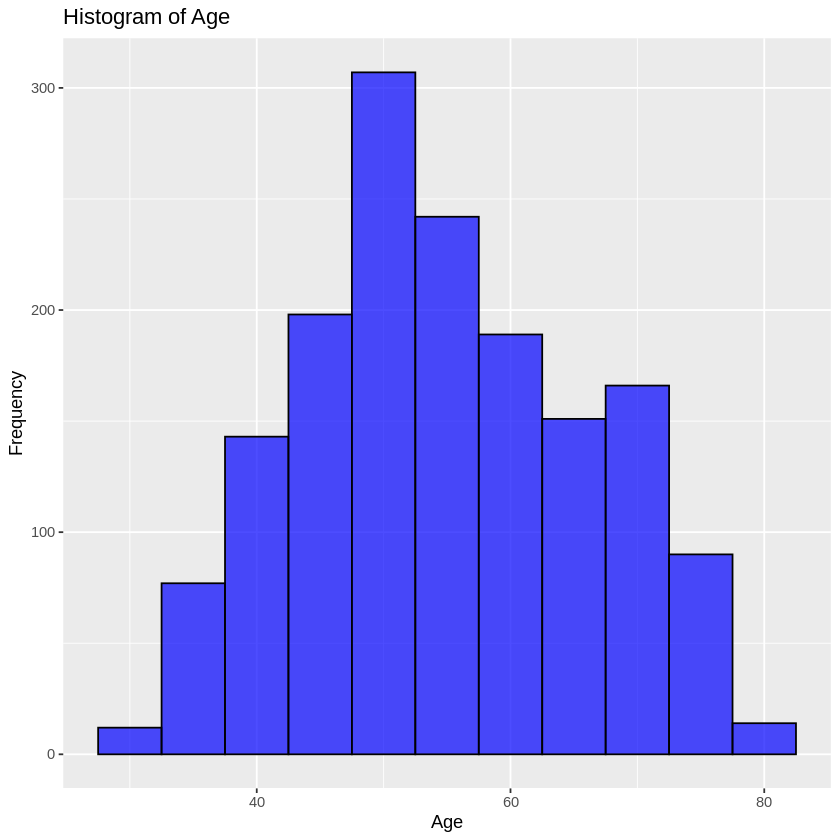

In [20]:
#histogram of Age
ggplot(data, aes(x = Age)) + geom_histogram(binwidth = 5, fill = "blue", color = "black", alpha = 0.7) + labs(title = "Histogram of Age", x = "Age", y = "Frequency")

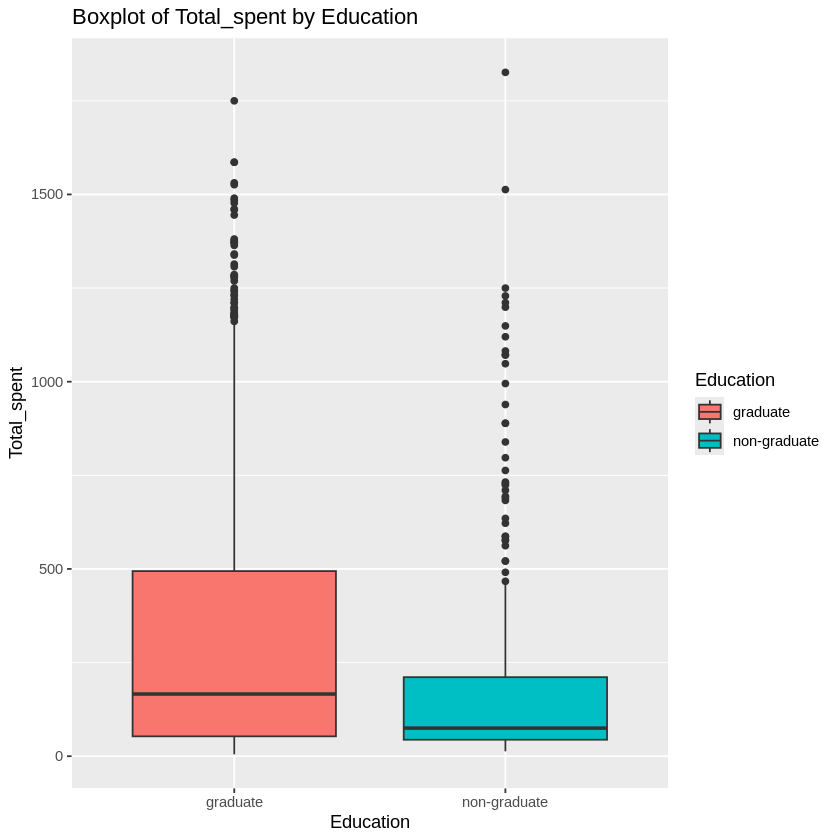

In [22]:
ggplot(data, aes(x = Education, y = Total_spent, fill = Education)) + geom_boxplot() + labs(title = "Boxplot of Total_spent by Education", x = "Education", y = "Total_spent")

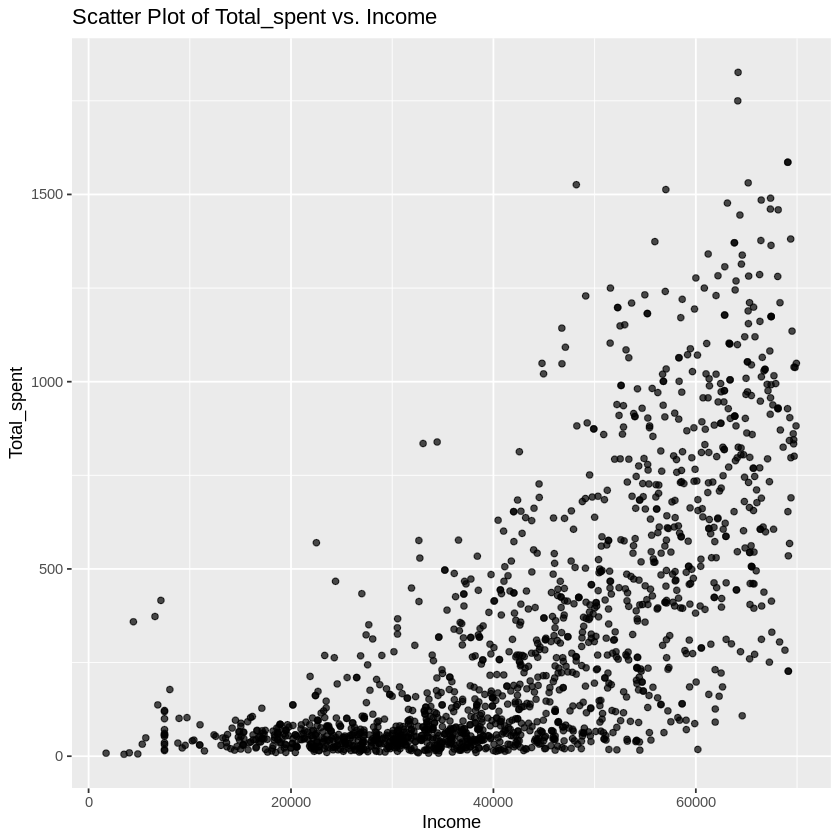

In [23]:
ggplot(data, aes(x = Income, y = Total_spent)) +geom_point(alpha = 0.7) +labs(title = "Scatter Plot of Total_spent vs. Income", x = "Income", y ="Total_spent")

In [33]:
# Assuming `data` is already loaded and contains the necessary columns

# Compute the correlation matrix
correlation_matrix <- cor(data[, c(3, 6:17, 25:26)])

# Set diagonal elements (correlation with itself) to NA
diag(correlation_matrix) <- NA

# Find the indices of the first ten pairs with the highest absolute correlation coefficients
max_correlation_indices <- order(abs(correlation_matrix), decreasing = TRUE)[1:10]
max_correlation_pairs <- matrix(NA, ncol = 2, nrow = 10)

# Extract variable names from indices
for (i in 1:10) {
  max_correlation_pairs[i, 1] <- rownames(correlation_matrix)[((max_correlation_indices[i] - 1) %% nrow(correlation_matrix)) + 1]
  max_correlation_pairs[i, 2] <- colnames(correlation_matrix)[ceiling(max_correlation_indices[i] / nrow(correlation_matrix))]
}

# Print the top variables with the highest correlation coefficients
cat("Top variables with the highest correlation coefficients:\n")
for (i in 1:10) {
  cat("Pair", i, ":", max_correlation_pairs[i, 1], "and", max_correlation_pairs[i, 2], "\n")
}


Top variables with the highest correlation coefficients:
Pair 1 : Total_spent and wines 
Pair 2 : wines and Total_spent 
Pair 3 : Total_spent and NumStorePurchases 
Pair 4 : NumStorePurchases and Total_spent 
Pair 5 : Total_spent and meat 
Pair 6 : meat and Total_spent 
Pair 7 : Total_spent and NumCatalogPurchases 
Pair 8 : NumCatalogPurchases and Total_spent 
Pair 9 : NumStorePurchases and wines 
Pair 10 : wines and NumStorePurchases 


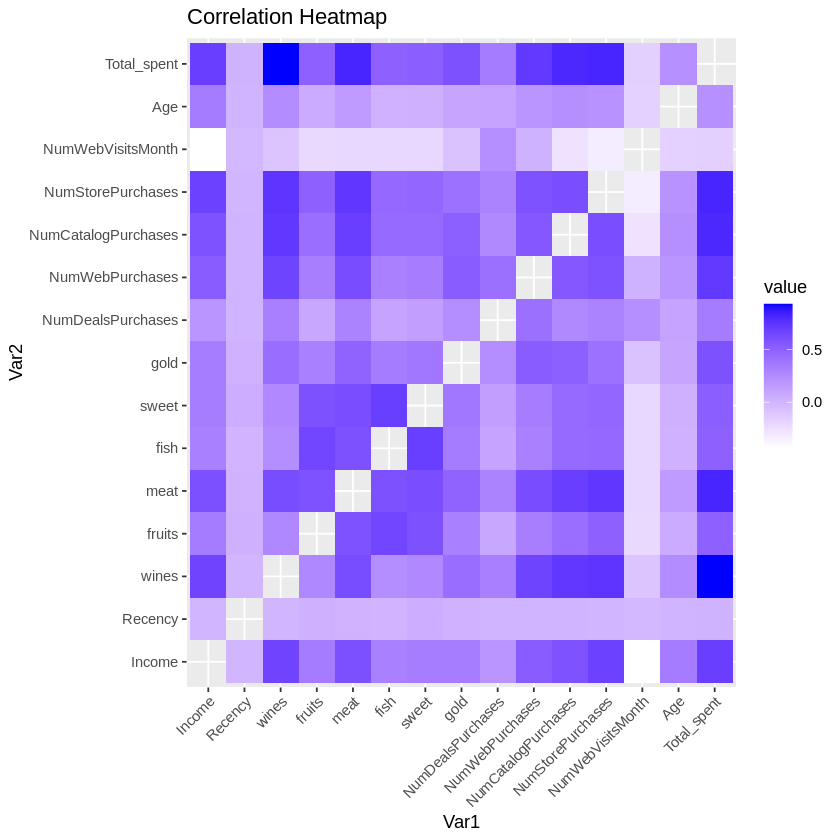

In [34]:
# Convert the correlation matrix to long format
correlation_long <- melt(correlation_matrix, na.rm = TRUE)

# Plot the correlation heatmap with rotated labels
ggplot(data = correlation_long, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "blue") +
  labs(title = "Correlation Heatmap") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))